<h1>ACM RecSys Challenge 2017 - Job Recommendation</h1>
<h2>Interacciones por días.</h2>
<h6>Jaume Espriu, Bet Herrera, Amadeo Irigoyen, Bartolomé Martínez</h6>

http://2017.recsyschallenge.com/


Interacciones por días

In [1]:
import time
import pandas as pd
def extraerInteractions(fecha):
    #timer
    t_start = time.time()
 
    aux=pd.DataFrame()
    i=0;
    for chunk in pd.read_csv('data/interactions.csv', sep='\t', iterator=True, chunksize=10000000):
        chunk.columns = [['user_id','item_id','interaction_type','created_at']]
    
        chunk['created_at_date'] = pd.to_datetime(arg=chunk.created_at,errors='coerce',unit='s')
    
        #fechas estilo '2016-11-6 00:00:00' y '2016-11-12 23:59:59'
        mask = (chunk['created_at_date']>=fecha+' 00:00:00') & (chunk['created_at_date']<=fecha+' 23:59:59')

        i +=1
        if i==1:
            aux=chunk.loc[mask]
        else:
            aux = aux.append(chunk.loc[mask])
        print(str(i)+"...")
    #end timer
    t_end=time.time()

    print "Time invested for "+fecha +"-->"+str((t_end-t_start))+" s - "
    aux.to_pickle('interactions-'+fecha+'.pkl')



In [5]:
import numpy as np
import datetime
        
base = datetime.date(2016,11,6)
date_list = [base + datetime.timedelta(days=x) for x in range(0, 94)]
print date_list
date_list[0].strftime("%Y-%m-%d")+" 00:00:00"

[datetime.date(2016, 11, 6), datetime.date(2016, 11, 7), datetime.date(2016, 11, 8), datetime.date(2016, 11, 9), datetime.date(2016, 11, 10), datetime.date(2016, 11, 11), datetime.date(2016, 11, 12), datetime.date(2016, 11, 13), datetime.date(2016, 11, 14), datetime.date(2016, 11, 15), datetime.date(2016, 11, 16), datetime.date(2016, 11, 17), datetime.date(2016, 11, 18), datetime.date(2016, 11, 19), datetime.date(2016, 11, 20), datetime.date(2016, 11, 21), datetime.date(2016, 11, 22), datetime.date(2016, 11, 23), datetime.date(2016, 11, 24), datetime.date(2016, 11, 25), datetime.date(2016, 11, 26), datetime.date(2016, 11, 27), datetime.date(2016, 11, 28), datetime.date(2016, 11, 29), datetime.date(2016, 11, 30), datetime.date(2016, 12, 1), datetime.date(2016, 12, 2), datetime.date(2016, 12, 3), datetime.date(2016, 12, 4), datetime.date(2016, 12, 5), datetime.date(2016, 12, 6), datetime.date(2016, 12, 7), datetime.date(2016, 12, 8), datetime.date(2016, 12, 9), datetime.date(2016, 12, 10

'2016-11-06 00:00:00'

In [15]:
for x in range(0, 94):
    extraerInteractions(date_list[x].strftime("%Y-%m-%d"))

Vamos a recuperar todos los user_id-items_id de esta primera semana y vamos a ver si hay alguno que no esté en usersItems

In [1]:
import pandas as pd 
datos1dia = pd.read_pickle('data/interaccionesxdia/interactions-2016-11-06.pkl')
datos1dia

,user_id,item_id,interaction_type,created_at,created_at_date
2627,788758,12770,1,1478475346,2016-11-06 23:35:46
6157,2018871,24650,1,1478474159,2016-11-06 23:15:59
10485,2177919,51500,4,1478476048,2016-11-06 23:47:28
11232,891609,54840,1,1478474929,2016-11-06 23:28:49
11339,1906767,54840,1,1478473403,2016-11-06 23:03:23
21008,1253814,93700,1,1478474327,2016-11-06 23:18:47
21011,1253814,93700,1,1478474308,2016-11-06 23:18:28
29003,1495307,135370,4,1478475117,2016-11-06 23:31:57
29463,540560,135370,4,1478475022,2016-11-06 23:30:22
30398,909792,139380,4,1478429721,2016-11-06 10:55:21


In [2]:
datos1dia.groupby(['interaction_type']).count()


,user_id,item_id,created_at,created_at_date
interaction_type,,,,
1,8017,8017,8017,8017
2,25,25,25,25
3,15,15,15,15
4,18693,18693,18693,18693


In [3]:
def get012345xfile(fecha):
 
    datosdia = pd.read_pickle('data/interaccionesxdia/interactions-'+fecha+'.pkl')

    res = datosdia.groupby(['interaction_type']).count()
    
    retorno = np.array([0,0,0,0,0,0])
    
    if (0 in res.index): 
        retorno[0]=res.user_id[0]
    if (1 in res.index): 
        retorno[1]=res.user_id[1]
    if (2 in res.index): 
        retorno[2]=res.user_id[2]
    if (3 in res.index): 
        retorno[3]=res.user_id[3]
    if (4 in res.index): 
        retorno[4]=res.user_id[4]
    if (5 in res.index): 
        retorno[5]=res.user_id[5]
        
    #print retorno;
    
    return retorno


In [6]:
interaccionsxdia = pd.DataFrame(columns=('fecha', 'interaccions0', 'interaccions1','interaccions2','interaccions3','interaccions4','interaccions5'))
for x in range(0, 94):
    aux = get012345xfile(date_list[x].strftime("%Y-%m-%d"))
    dict = {'fecha':date_list[x], 'interaccions0':aux[0], 'interaccions1':aux[1],'interaccions2':aux[2],'interaccions3':aux[3],'interaccions4':aux[4],'interaccions5':aux[5]}
    interaccionsxdia= interaccionsxdia.append(dict,ignore_index=True)


In [7]:
print interaccionsxdia.interaccions0.max()
print interaccionsxdia.interaccions1.max()
print interaccionsxdia.interaccions2.max()
print interaccionsxdia.interaccions3.max()
print interaccionsxdia.interaccions4.max()
print interaccionsxdia.interaccions5.max()
interaccionsxdia.head(5)


17883021
405864
19814
5570
44521
18201


,fecha,interaccions0,interaccions1,interaccions2,interaccions3,interaccions4,interaccions5
0,2016-11-06,0,8017,25,15,18693,0
1,2016-11-07,0,80639,2653,1760,44521,0
2,2016-11-08,0,91408,2906,2006,43969,0
3,2016-11-09,0,87213,2907,1732,25382,0
4,2016-11-10,0,80756,2597,1646,24391,0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [10]:

#% matplotlib

plt.figure(figsize=(15,5))
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions1/10000, fmt="",label="tipus 1")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions2/10000, fmt="",label="tipus 2")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions3/10000, fmt="",label="tipus 3")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions4/10000, fmt="",label="tipus 4")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions5/10000, fmt="",label="tipus 5")
plt.title("Tipus interaccions per dia (sense les 0)")
plt.ylabel("Numero interaccions")
plt.legend()
plt.grid(True)
plt.show()

Using matplotlib backend: Qt5Agg


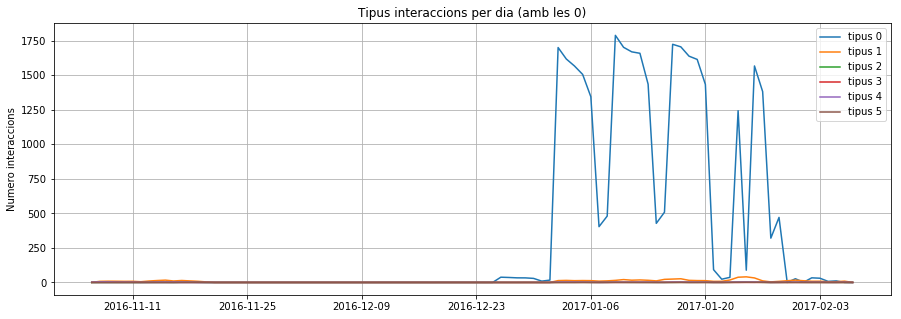

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(15,5))
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions0/10000, fmt="",label="tipus 0")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions1/10000, fmt="",label="tipus 1")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions2/10000, fmt="",label="tipus 2")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions3/10000, fmt="",label="tipus 3")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions4/10000, fmt="",label="tipus 4")
plt.plot_date(x=interaccionsxdia.fecha, y=interaccionsxdia.interaccions5/10000, fmt="",label="tipus 5")
plt.title("Tipus interaccions per dia (amb les 0)")
plt.ylabel("Numero interaccions")
plt.legend()
plt.grid(True)
plt.show()

Este notebook nos sirve para dos cosas:
    - por un lado, como utilidad para extraer un fichero PKL por dia con los datos de las interacciones 012345 de dicho día.
    - por otro para comprobar que las interacciones, agrupadas por días y por tipos no tienen una distribución contínua, dan una gráfica bastante bizarra. ¿Es posible que esto afecte al clasificador?¿Estaría bien elegis sólo algunos días/periodos?